In [4]:
!kaggle datasets download -d zafarali27/house-price-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/zafarali27/house-price-prediction-dataset
License(s): CC0-1.0
house-price-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
from google.colab import files
import zipfile
import os

filename = r'/content/house-price-prediction-dataset.zip'

extract_dir = r'/content//content/house-price-prediction'
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'Files extracted to {extract_dir}')

Files extracted to /content//content/house-price-prediction


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv('//content/content/house-price-prediction/House Price Prediction Dataset.csv')

In [10]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [11]:
df.head(10)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
5,6,3944,1,2,1,1906,Urban,Poor,No,93262
6,7,3671,1,1,2,1948,Rural,Poor,Yes,448722
7,8,3419,2,4,1,1925,Suburban,Good,Yes,594893
8,9,630,2,2,1,1932,Rural,Poor,Yes,652878
9,10,2185,3,3,1,2000,Downtown,Poor,No,340375


In [12]:
df.shape

(2000, 10)

In [13]:

df['Garage'] = df['Garage'].map({'Yes': 1, 'No': 0})


In [14]:
print(df['Condition'].unique())

['Excellent' 'Good' 'Fair' 'Poor']


In [15]:
# Mapping Condition to binary values
df['Condition'] = df['Condition'].map({'Excellent': 1,'Good': 1,'Fair': 0,'Poor': 0})


In [16]:
print(df['Location'].unique())

['Downtown' 'Suburban' 'Urban' 'Rural']


In [18]:
df.head(10)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,1,0,149919
1,2,4272,5,4,3,1958,Downtown,1,0,424998
2,3,3592,2,2,3,1938,Downtown,1,0,266746
3,4,966,4,2,2,1902,Suburban,0,1,244020
4,5,4926,1,4,2,1975,Downtown,0,1,636056
5,6,3944,1,2,1,1906,Urban,0,0,93262
6,7,3671,1,1,2,1948,Rural,0,1,448722
7,8,3419,2,4,1,1925,Suburban,1,1,594893
8,9,630,2,2,1,1932,Rural,0,1,652878
9,10,2185,3,3,1,2000,Downtown,0,0,340375


In [19]:
df.isnull().sum()

,0
Id,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


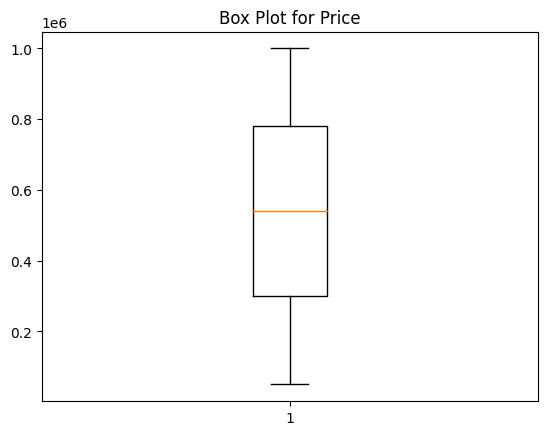

In [20]:
import matplotlib.pyplot as plt

# Box plot for a specific column (e.g., Price)
plt.boxplot(df['Price'])
plt.title('Box Plot for Price')
plt.show()


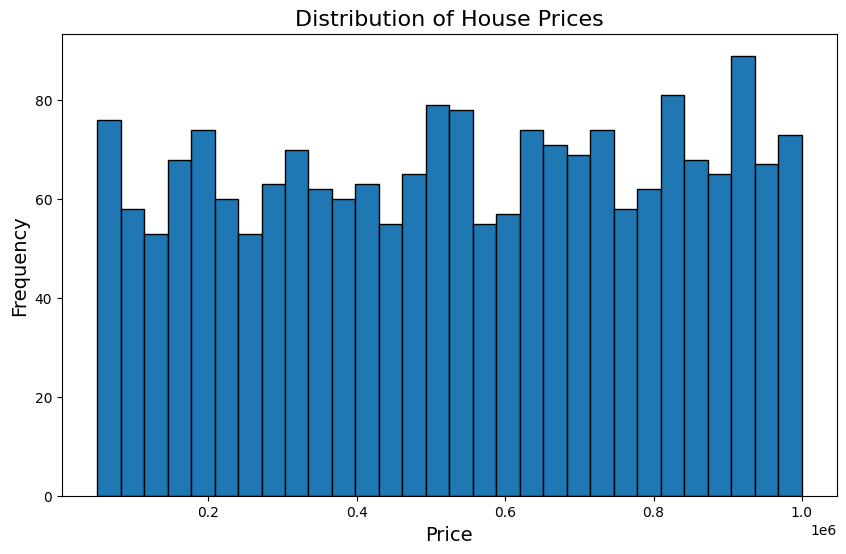

In [21]:
plt.figure(figsize=(10,6))
plt.hist(df['Price'], bins=30, edgecolor='black')  # Adjust bins for granularity
plt.title('Distribution of House Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [22]:

correlation = df['Price'].corr(df['Area'])
print(f'Correlation between Price and Area: {correlation}')


Correlation between Price and Area: 0.0015421203243642292


In [23]:
# Calculate the correlation between Area and Bedrooms, Bathrooms, Floors
correlation_bedrooms = df['Area'].corr(df['Bedrooms'])
correlation_bathrooms = df['Area'].corr(df['Bathrooms'])
correlation_floors = df['Area'].corr(df['Floors'])

# Print the results
print(f'Correlation between Area and Bedrooms: {correlation_bedrooms}')
print(f'Correlation between Area and Bathrooms: {correlation_bathrooms}')
print(f'Correlation between Area and Floors: {correlation_floors}')



Correlation between Area and Bedrooms: 0.047523355825547474
Correlation between Area and Bathrooms: 0.02188077748117473
Correlation between Area and Floors: 0.017749386960536368


In [24]:
# Calculate the correlation between Garage and Price
correlation_garage_price = df['Garage'].corr(df['Price'])

# Print the result
print(f'Correlation between Garage and Price: {correlation_garage_price}')


Correlation between Garage and Price: 0.0028421499555363297


In [25]:
# Calculate the correlation between YearBuilt and Price
correlation_yearbuilt_price = df['YearBuilt'].corr(df['Price'])

# Print the result
print(f'Correlation between YearBuilt and Price: {correlation_yearbuilt_price}')


Correlation between YearBuilt and Price: 0.004845163834697287


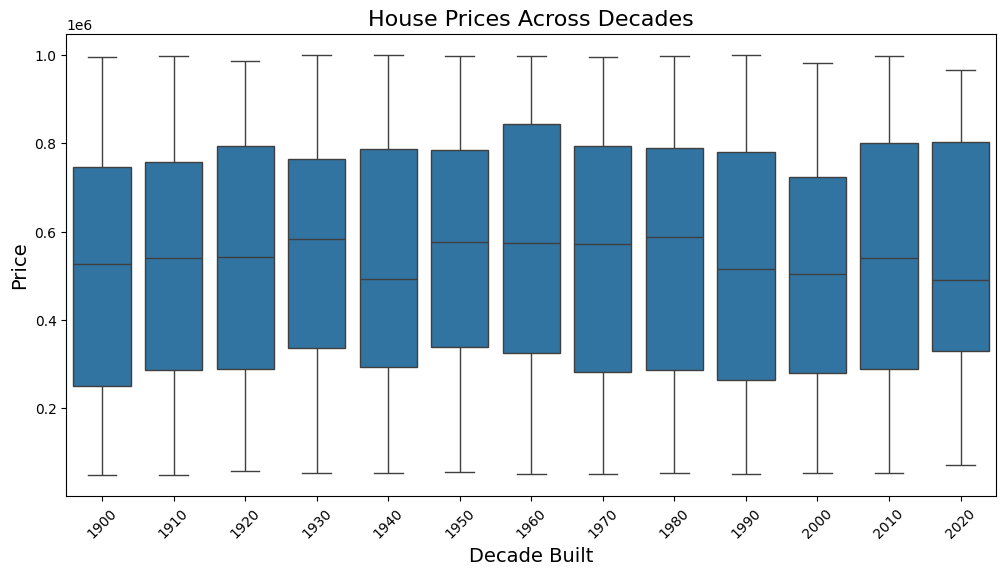

In [30]:
# Create a new column for decade
#df['Decade'] = (df['YearBuilt'] // 10) * 10

# Box plot of Price by Decade
plt.figure(figsize=(12,6))
sns.boxplot(x='Decade', y='Price', data=df)

# Add titles and labels
plt.title('House Prices Across Decades', fontsize=16)
plt.xlabel('Decade Built', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()


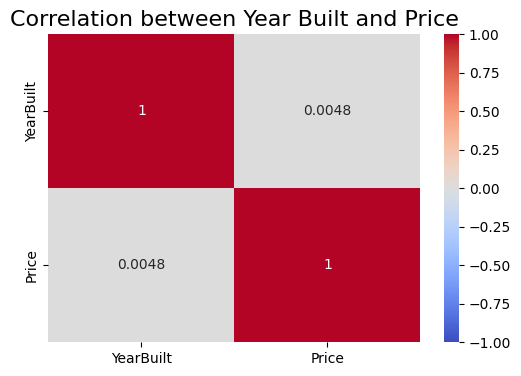

In [31]:
# Correlation heatmap for Price and YearBuilt
plt.figure(figsize=(6,4))
sns.heatmap(df[['YearBuilt', 'Price']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title
plt.title('Correlation between Year Built and Price', fontsize=16)

# Show the plot
plt.show()

In [33]:
# Calculate the correlation between binary Condition and Price
correlation_condition_price = df['Condition'].corr(df['Price'])

# Print the result
print(f'Correlation between Condition and Price: {correlation_condition_price}')


Correlation between Condition and Price: -0.027174098385518024


In [34]:
# Count of houses in each condition category
df['Condition'].value_counts()


,count
Condition,
0,1028
1,972


In [35]:
# Mapping Condition to a more detailed numeric scale
df['Condition'] = df['Condition'].map({
    'Excellent': 4,
    'Good': 3,
    'Fair': 2,
    'Poor': 1
})

In [36]:
# Calculate the correlation between binary Condition and Price
correlation_condition_price = df['Condition'].corr(df['Price'])

# Print the result
print(f'Correlation between Condition and Price: {correlation_condition_price}')

Correlation between Condition and Price: nan


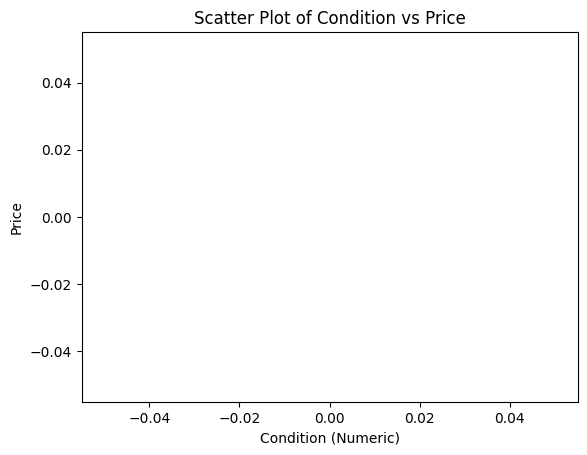

In [38]:
# Scatter plot of Condition and Price
sns.scatterplot(x='Condition', y='Price', data=df)

# Add titles and labels
plt.title('Scatter Plot of Condition vs Price')
plt.xlabel('Condition (Numeric)')
plt.ylabel('Price')

plt.show()

Text(0.5, 1.0, 'House Price vs Size')

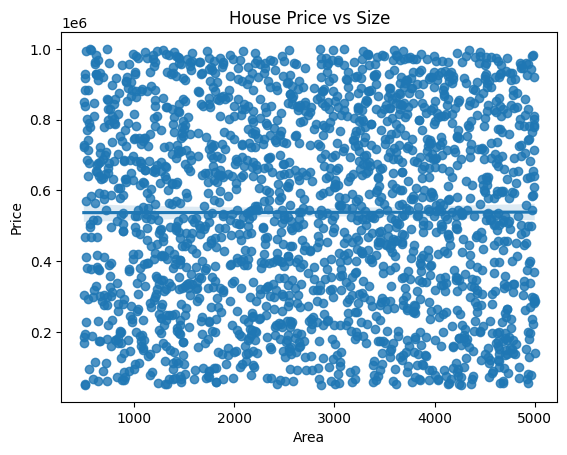

In [40]:
sns.regplot(x='Area', y='Price', data=df)
plt.title('House Price vs Size')


Text(0.5, 1.0, 'House Price by Number of Bedrooms')

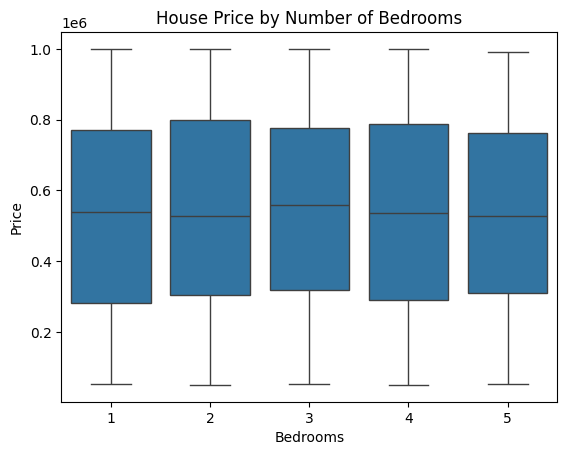

In [41]:
sns.boxplot(x='Bedrooms', y='Price', data=df)
plt.title('House Price by Number of Bedrooms')


Text(0.5, 1.0, 'House Price by Number of Bedrooms')

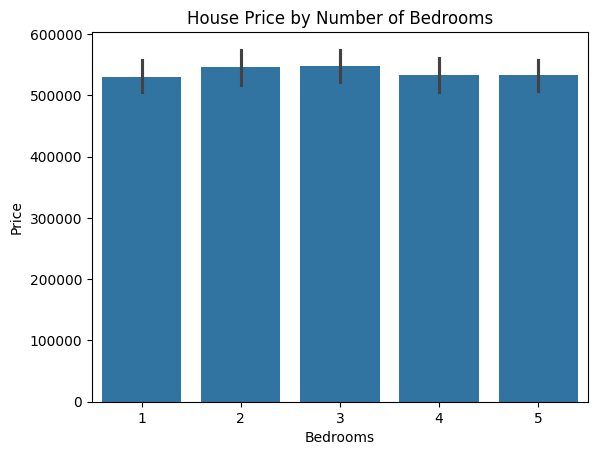

In [45]:
sns.barplot(x='Bedrooms', y='Price', data=df)
plt.title('House Price by Number of Bedrooms')

Text(0.5, 1.0, 'House Price by Number of Bathrooms')

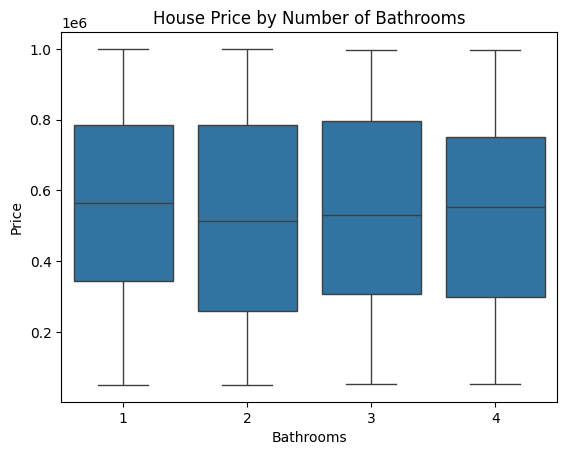

In [42]:
sns.boxplot(x='Bathrooms', y='Price', data=df)
plt.title('House Price by Number of Bathrooms')


Text(0.5, 1.0, 'Average House Price by Location')

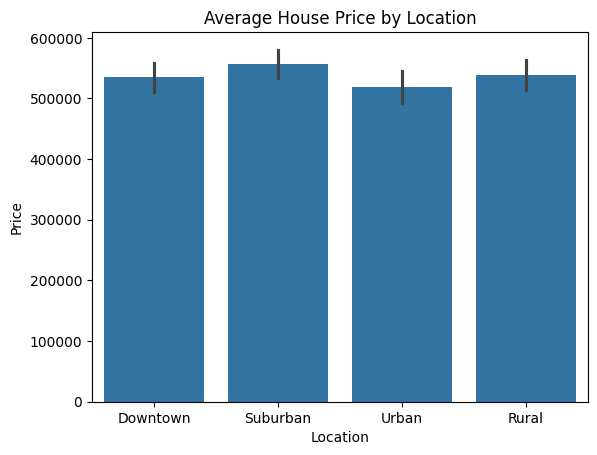

In [43]:
sns.barplot(x='Location', y='Price', data=df)
plt.title('Average House Price by Location')


Text(0.5, 1.0, 'House Price by Garage Availability')

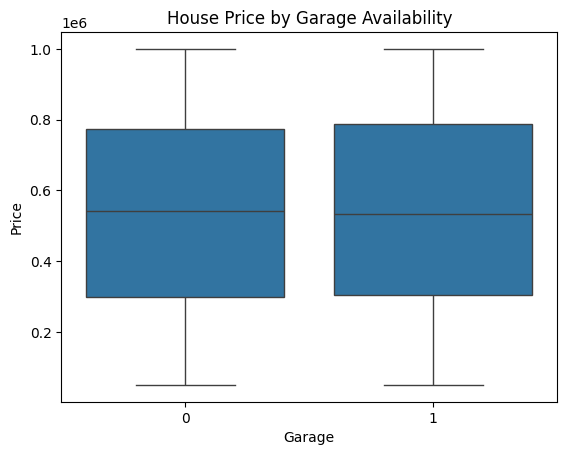

In [46]:
sns.boxplot(x='Garage', y='Price', data=df)
plt.title('House Price by Garage Availability')


Text(0.5, 1.0, 'House Price vs Age of Property')

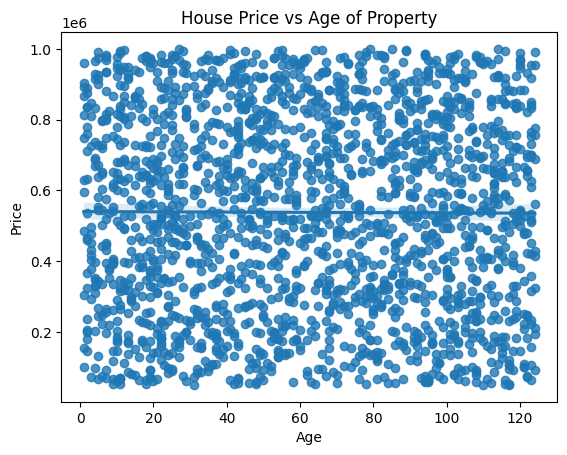

In [47]:
df['Age'] = 2024 - df['YearBuilt']  # Adjust the current year as needed
sns.regplot(x='Age', y='Price', data=df)
plt.title('House Price vs Age of Property')


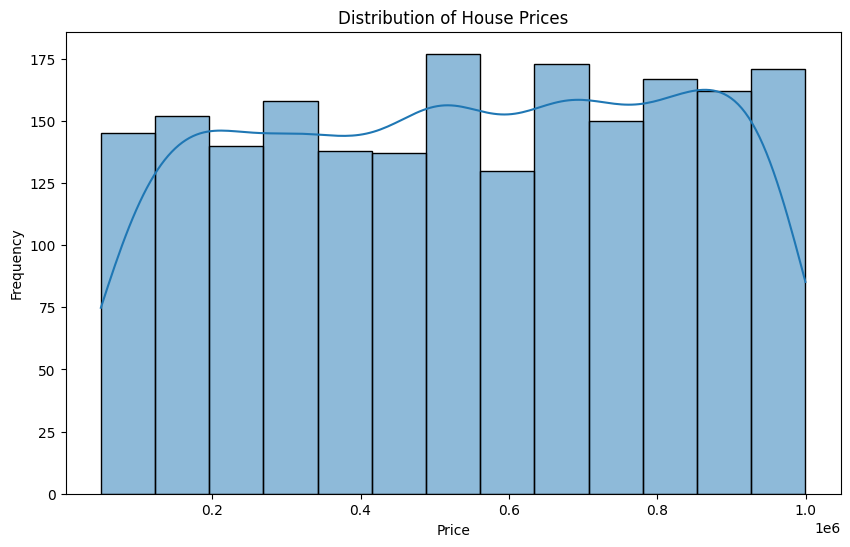

In [54]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



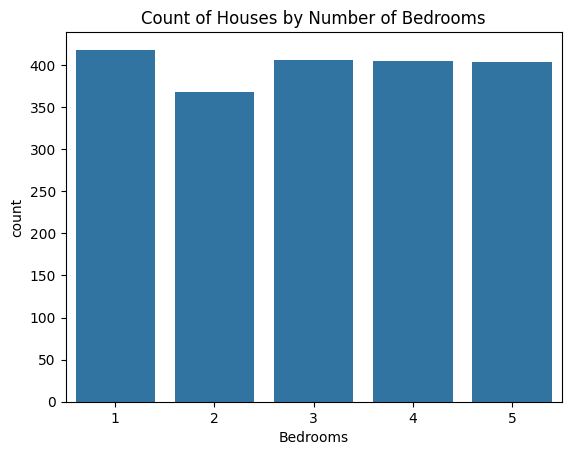

In [55]:
sns.countplot(x='Bedrooms', data=df)
plt.title('Count of Houses by Number of Bedrooms')
plt.show()


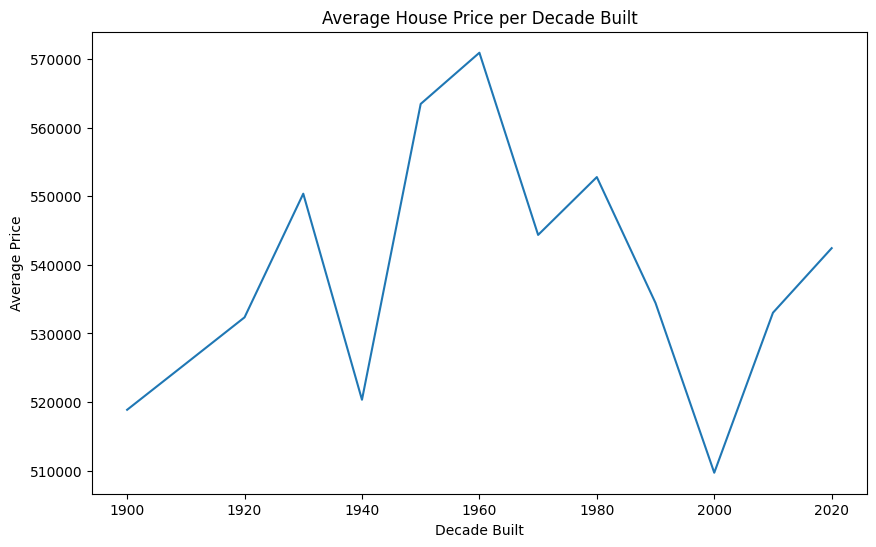

In [56]:
df['Decade'] = (df['YearBuilt'] // 10) * 10
avg_price_per_decade = df.groupby('Decade')['Price'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=avg_price_per_decade.index, y=avg_price_per_decade.values)
plt.title('Average House Price per Decade Built')
plt.xlabel('Decade Built')
plt.ylabel('Average Price')
plt.show()
